In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [6]:
# reflect an existing database into a new model
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

(latest_date, ) = most_recent
latest_date = dt.datetime.strptime(latest_date, '%Y-%m-%d')
latest_date = latest_date.date()
date_year_ago = latest_date - relativedelta(years=1)
date_year_ago
# Perform a query to retrieve the data and precipitation scores
data_from_last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_year_ago).all()
data_from_last_year
# Save the query results as a Pandas DataFrame and set the index to the date column
data_df = pd.DataFrame(data_from_last_year, columns=['Date', 'Prcp'])
data_df
# Drop null values (if any).
data_df = data_df.dropna(how="any")

# Sort the dataframe by date
data_df = data_df.sort_values(by=['Date'])
data_df


,Date,Prcp
0,2016-08-23,0.00
1192,2016-08-23,0.02
704,2016-08-23,0.05
1881,2016-08-23,0.70
361,2016-08-23,0.15
...,...,...
2228,2017-08-22,0.50
360,2017-08-23,0.00
1528,2017-08-23,0.08
1008,2017-08-23,0.00


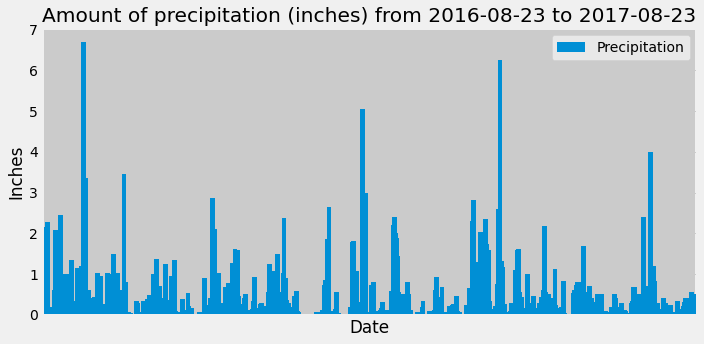

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot it.
data_plot = data_df.plot(kind="bar", figsize=(10, 5), width=15)

# Add legend
data_plot.legend(["Precipitation"],loc="upper right")

# Add labels to axes.
data_plot.set_xlabel("Date")
data_plot.set_ylabel("Inches")

# Set a title for the chart
data_plot.set_title(f"Amount of precipitation (inches) from {date_year_ago} to {latest_date}")

plt.tick_params(
    axis='x',         
    which='both',    
    bottom=False,      
    top=False,        
    labelbottom=False
)

# Tighten the graph up so it displays nicely.
plt.tight_layout()

# Add grid lines.
data_plot.grid(zorder=1)

# Save figure
plt.savefig(f"./Images/precipitation_data_from_{date_year_ago}_to_{latest_date}.png", bbox_inches='tight')

# Show graph.
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_df.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
Count_Stations = session.query(Station.station).count()
Count_Stations

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Most_Active_Stations = session.query(Measurement.station, func.count()).group_by(Measurement.station).\
    order_by(func.count().desc()).all()
for station, count in Most_Active_Stations:
    print(station,count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [16]:
most_active_station = session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count().desc()).first()
most_active_station

('USC00519281',)

In [17]:
(most_active_station_id, ) = most_active_station
print(f"The station id of the most active station is {most_active_station_id}.")

The station id of the most active station is USC00519281.


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).all()

for lowest_temp, highest_temp, avg_temp in most_active_station_data:
    print(f"Lowest temperature in most active station is {lowest_temp}")
    print(f"Highest temperature in most active station is {highest_temp}")
    print(f"Average temperature in most active station is {avg_temp}")


Lowest temperature in most active station is 54.0
Highest temperature in most active station is 85.0
Average temperature in most active station is 71.66378066378067


In [19]:
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).\
    filter(Measurement.station == most_active_station_id).first()
max_date

('2017-08-18',)

In [20]:
(latest_date,) = max_date
print(f"The latest date of the most active station is {latest_date}.")

The latest date of the most active station is 2017-08-18.


The latest date of the most active station is 2017-08-18.
12 month past date of the most active station is 2016-08-18.


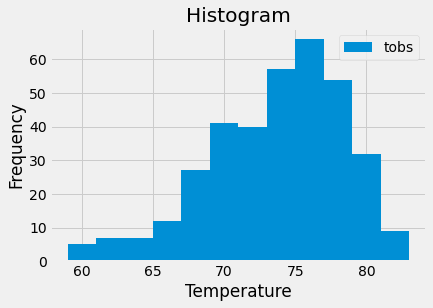

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

(latest_date,) = max_date
print(f"The latest date of the most active station is {latest_date}.")

latest_date = dt.datetime.strptime(latest_date, '%Y-%m-%d')
latest_date = latest_date.date()
date_year_ago = latest_date - relativedelta(years=1)
print(f"12 month past date of the most active station is {date_year_ago}.")

last_year_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= date_year_ago).all()
last_year_data

last_year_data_df = pd.DataFrame(last_year_data, columns=['date', 'tobs'])
last_year_data_df

plt.hist(last_year_data_df["tobs"], bins=12, label="tobs")
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.title(f"Histogram")
plt.grid(zorder=0)
plt.legend(loc="upper right")
plt.savefig(f"./Images/tobs_histogram_for_station_{most_active_station_id}.png", bbox_inches='tight')
plt.show()

# Close session

In [22]:
# Close Session
session.close()